# Inverse mode

This notebook demonstrates how to use the inverse mode.

For the sake of simplicity, we are not going to use the TemporalBasisTransformation
network class, but instead we rely on the Numpy reference implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import dlop_ldn_function_bases as bases

from filtered_gaussian_signal import FilteredGaussianSignal

from temporal_basis_transformation_network import Forward, Inverse
from temporal_basis_transformation_network.reference import trafo

import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

First, generate a basis transformation matrix $\mathbf{H}$ and a simple sine-wave as an input signal.

In [7]:
q, N = 6, 100
N_smpls = 2 * N
H = bases.mk_ldn_basis(q, N)

ts = np.linspace(0, N_smpls / N, N_smpls)
xs = FilteredGaussianSignal(freq_high=5.0, dt=1/N)(N_smpls)

Now, transform the signal into the temporal basis space. We will get $N_\mathrm{smpls} - N + 1$ samples as a result since we set `pad` to false.

In [8]:
ys = trafo(xs, H, pad=False)

Use inverse mode to reconstruct the original signal. The reconstruction will be done at each sample independently.

In [9]:
xs_inv = trafo(ys, H, mode=Inverse, collapse=(True, False))

Plot the original signal, the representation in the function basis, as well as all the decoded signals over time.

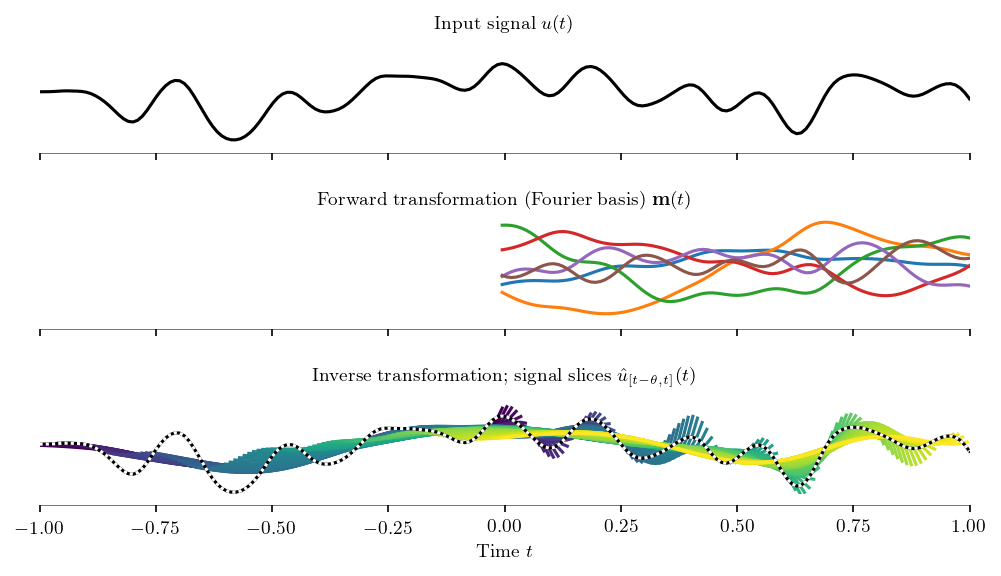

In [19]:
fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={
    "hspace": 0.75
}, figsize=(8.0, 4.0))
axs[0].plot(ts - 1.0, xs[:, 0], 'k')
axs[0].set_title("Input signal $u(t)$")
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_yticks([])

axs[1].plot(ts[N - 1:] - 1.0, ys)
axs[1].set_title("Forward transformation (LDN basis) $\\mathbf{m}(t)$")
axs[1].set_yticks([])

for i in range(xs_inv.shape[0]):
    N_cycle = N + 1
    color = cm.get_cmap('viridis')((i % N_cycle) / (N_cycle - 1))
    axs[2].plot(ts[:N] + i / N - 1.0, xs_inv[i, 0, :], color=color);

axs[2].plot(ts - 1.0, xs[:, 0], 'k')
axs[2].plot(ts - 1.0, xs[:, 0], linestyle=(0, (1, 1)), color='white')
axs[2].set_ylim(-1.5, 1.5)
axs[2].set_title("Inverse transformation; signal slices $\hat u_{[t - \\theta, t]}(t)$")
axs[2].set_xlabel('Time $t$')
axs[2].set_xlim(-1, 1)
axs[2].set_yticks([])

for ax in axs.flat:
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position(('outward', 5))
    ax.spines["left"].set_visible(False)

fig.savefig('../doc/forward_inverse_example.png', transparent=True, bbox_inches='tight', dpi=300)